In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils.losses import mean_squared_error

In [2]:
def preprocess_data(data_file = "datasets/boston_housing_data"):
    '''
    Description:
        Function to preprocess Boston Housing data
    Args:
        data_file: path to the data file as <str>
    Returns:
        preprocessed_data: data as <numpy array>
    Exception:
        general exception
    '''
    
    # Read data
    with open(data_file, "r") as f:
        data = f.read()
        
    # Remove unwanted stuff
    data = data.replace("\n  ", "  ") # remove irregular new line characters
    data = data.replace("   ", "  ") # convert triple-spaces to double spaces
    data = data.replace("  ", " ") # convert double spaces to single spaces
    samples = [d[1:] for d in data.split("\n")] # remove the leading space
    actual_samples = samples[22:] # Actual data starts from line 23
    
    # Extract samples
    error_count = 0
    X = list()
    y = list()
    for sample in actual_samples:
        try:
            sample = np.array([float(i) for i in sample.split(" ")])
            X.append(sample[:-1])
            y.append(sample[-1])
        except:
            error_count += 1
            continue
    print("Ommitted %d erroneous samples"%(error_count))
    return scale_features(np.array(X)), np.array(y) # Return as NumPy array

def scale_features(X): # normlization for uniformity
    return np.transpose(np.array([x/max(x) for x in np.transpose(X)]))

class stochaistic_gradient_descent:
    def __init__(self, J, dJ, learning_rate = 0.0001, max_iterations = 1000, precision = 1e-4):
        self.learning_rate = learning_rate # how much to update
        self.max_iterations = max_iterations # when to stop
        self.precision = precision # how precise the values are to be
        self.J = J # loss function
        self.dJ = dJ # first derivative of the loss function
        self.loss_history = list()
        self.stop_count = 0
        
    def run_SGD(self, X, Y, theta):
        for i in range(self.max_iterations):
            prev_theta = theta
            theta -= self.learning_rate * dJ(X, Y, theta)
            if np.all([abs(pt - ct) < self.precision for pt, ct in zip(prev_theta, theta)]) < 1: self.stop_count += 1; break
        loss = self.J(calc_h(theta, X), Y)
        self.loss_history.append(loss)
        return theta

def add_X_bias(x):
    return x    
    # [1] is for adding bias as such and to simplify math
    return np.concatenate((x,[1]), axis = 0)

def h(theta, x):
    # hypothesis function
    return np.dot(theta, add_X_bias(x))

def calc_h(theta, X):
    # calculates the value of hypothesis function for each of the sample
    return np.array([h(theta, x) for x in X.tolist()])

def dJ(X, Y, theta):
    # dervivative of mse
    return ((2/len(X[0])) * np.dot(np.transpose(np.array([add_X_bias(x) for x in X])), (calc_h(theta, X) - Y)))

def linear_regression(X, Y, iterations = 500):
    # weights to find
    theta = np.zeros(X[0].shape[-1]) # + 1) # theta_array[-1] -> bias
    
    for i in tqdm(range(iterations)):
        # forward pass
        # predicted = calc_h(theta, X)

        # back propagation
        if sgd.stop_count > 10: break
        theta = sgd.run_SGD(X, Y,theta)       
    return theta

In [3]:
X, y = preprocess_data() # or you can simply load directly from sklearn
loss = mean_squared_error # replace any other loss of choice
X, Y, X_t, Y_t = X[:400], y[:400], X[400:], y[400:] # splitting train and test set

Ommitted 9 erroneous samples


In [4]:
sgd = stochaistic_gradient_descent(mean_squared_error, dJ)
best_theta = linear_regression(X,Y) # find best theta

100%|██████████| 2000/2000 [1:13:41<00:00,  2.21s/it]    


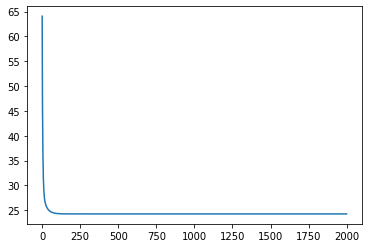

In [5]:
plt.plot(sgd.loss_history)
plt.show()

In [6]:
best_theta

array([ -3.92771184,   4.47504923,   1.14194685,   2.06392806,
        -0.49085951,  53.95645515,  -0.05625667, -10.83108319,
         8.38470785,  -9.00468931,  -9.69637451,   4.40342999,
       -18.69684997])

In [7]:
def evaluate():
    test_prediction = calc_h(best_theta, X_t)
    print(mean_squared_error(test_prediction, Y_t))

In [8]:
evaluate()

33.87700925600075


In [9]:
import pickle
with open("best_theta.pkl", "wb") as f:
    pickle.dump(best_theta_theta, f) # saving as a backup